<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork865-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align=center><font size = 5>Assignment: SQL Notebook for Peer Assignment</font></h1>

Estimated time needed: **60** minutes.

## Introduction
Using this Python notebook you will:

1.  Understand the Spacex DataSet
2.  Load the dataset  into the corresponding table in a Db2 database
3.  Execute SQL queries to answer assignment questions 


## Overview of the DataSet

SpaceX has gained worldwide attention for a series of historic milestones. 

It is the only private company ever to return a spacecraft from low-earth orbit, which it first accomplished in December 2010.
SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars wheras other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. 


Therefore if we can determine if the first stage will land, we can determine the cost of a launch. 

This information can be used if an alternate company wants to bid against SpaceX for a rocket launch.

This dataset includes a record for each payload carried during a SpaceX mission into outer space.


### Download the datasets

This assignment requires you to load the spacex dataset.

In many cases the dataset to be analyzed is available as a .CSV (comma separated values) file, perhaps on the internet. Click on the link below to download and save the dataset (.CSV file):

 <a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_2/data/Spacex.csv" target="_blank">Spacex DataSet</a>



### Connect to the database

Let us first load the SQL extension and establish a connection with the database


In [2]:
import csv, mysql.connector 
import pandas as pd
from mysql.connector import Error

df = pd.read_csv(r"D:\09_Trainings\03_DataScienceCERT\dataSets\Spacex.csv")
df

,Date,Time (UTC),Booster_Version,Launch_Site,Payload,PAYLOAD_MASS__KG_,Orbit,Customer,Mission_Outcome,Landing_Outcome
0,06/04/2010,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,0.0,LEO,SpaceX,Success,Failure (parachute)
1,12/08/2010,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel of...",0.0,LEO (ISS),NASA (COTS) NRO,Success,Failure (parachute)
2,22/05/2012,7:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2,525.0,LEO (ISS),NASA (COTS),Success,No attempt
3,10/08/2012,0:35:00,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500.0,LEO (ISS),NASA (CRS),Success,No attempt
4,03/01/2013,15:10:00,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677.0,LEO (ISS),NASA (CRS),Success,No attempt
...,...,...,...,...,...,...,...,...,...,...
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
mydb = mysql.connector.connect(host = "localhost", user = "VisCode", password = "Ui.254710")
cursor = mydb.cursor()


for i,row  in df.iterrows():
            sql = "INSERT INTO ibm_capstone.spacex_launches(Date_of_Launch, Time_Of_Launch, Booster_Version, Launch_Site, Payload, Payload_mass_kg, Orbit, Customer, Mission_Outcome, Landing_Outcome)"\
                    "VALUES (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)"
            cursor.execute(sql, tuple(row))
            # the connection is not auto committed by default, so we must commit to save our changes
            mydb.commit()

cursor.close()
print ("Done")

## Tasks

Now write and execute SQL queries to solve the assignment tasks.

**Note: If the column names are in mixed case enclose it in double quotes
   For Example "Landing_Outcome"**

### Task 1




##### Display the names of the unique launch sites  in the space mission


In [19]:
cursor.execute("SELECT DISTINCT Launch_site FROM ibm_capstone.spacex_launches;")
result = cursor.fetchall()
for x in result:
    print(x)

('CCAFS LC-40',)
('VAFB SLC-4E',)
('KSC LC-39A',)
('CCAFS SLC-40',)



### Task 2


#####  Display 5 records where launch sites begin with the string 'CCA' 


In [20]:
cursor.execute("SELECT * FROM ibm_capstone.spacex_launches WHERE Launch_site LIKE 'CCA%' LIMIT 5;")
result = cursor.fetchall()
for x in result:
    print(x)

('06/04/2010', '18:45:00', 'F9 v1.0  B0003', 'CCAFS LC-40', 'Dragon Spacecraft Qualification Unit', 0, 'LEO', 'SpaceX', 'Success', 'Failure (parachute)')
('12/08/2010', '15:43:00', 'F9 v1.0  B0004', 'CCAFS LC-40', 'Dragon demo flight C1, two CubeSats, barrel of Brouere cheese', 0, 'LEO (ISS)', 'NASA (COTS) NRO', 'Success', 'Failure (parachute)')
('22/05/2012', '7:44:00', 'F9 v1.0  B0005', 'CCAFS LC-40', 'Dragon demo flight C2', 525, 'LEO (ISS)', 'NASA (COTS)', 'Success', 'No attempt')
('10/08/2012', '0:35:00', 'F9 v1.0  B0006', 'CCAFS LC-40', 'SpaceX CRS-1', 500, 'LEO (ISS)', 'NASA (CRS)', 'Success', 'No attempt')
('03/01/2013', '15:10:00', 'F9 v1.0  B0007', 'CCAFS LC-40', 'SpaceX CRS-2', 677, 'LEO (ISS)', 'NASA (CRS)', 'Success', 'No attempt')


### Task 3




##### Display the total payload mass carried by boosters launched by NASA (CRS)


In [22]:
cursor.execute("SELECT SUM(Payload_mass_kg) FROM ibm_capstone.spacex_launches WHERE Customer LIKE 'NASA (CRS)';")
result = cursor.fetchall()
for x in result:
    print(x)

(Decimal('45596'),)


### Task 4




##### Display average payload mass carried by booster version F9 v1.1


In [23]:
cursor.execute("SELECT AVG(Payload_mass_kg) FROM ibm_capstone.spacex_launches WHERE Booster_Version LIKE 'F9 v1.1';")
result = cursor.fetchall()
for x in result:
    print(x)

(Decimal('2928.4000'),)


### Task 5

##### List the date when the first succesful landing outcome in ground pad was acheived.


_Hint:Use min function_ 


In [24]:
cursor.execute("SELECT MIN(STR_TO_DATE(Date_of_Launch, '%d/%m/%Y')) FROM ibm_capstone.spacex_launches WHERE Booster_Version LIKE 'F9 v1.1';")
result = cursor.fetchall()
for x in result:
    print(x)

(datetime.date(2013, 3, 12),)


### Task 6

##### List the names of the boosters which have success in drone ship and have payload mass greater than 4000 but less than 6000


In [25]:
cursor.execute("SELECT DISTINCT(Booster_Version) FROM ibm_capstone.spacex_launches WHERE Landing_Outcome = 'Success (drone ship)' AND Payload_Mass_KG>4000 AND Payload_Mass_KG<6000;")
result = cursor.fetchall()
for x in result:
    print(x)

('F9 FT B1022',)
('F9 FT B1026',)
('F9 FT  B1021.2',)
('F9 FT  B1031.2',)


### Task 7




##### List the total number of successful and failure mission outcomes


In [26]:
cursor.execute("SELECT COUNT(*) AS Successful_Mission FROM ibm_capstone.spacex_launches WHERE Mission_Outcome = 'Success';")
result = cursor.fetchall()
for x in result:
    print(x)

(98,)


### Task 8



##### List the   names of the booster_versions which have carried the maximum payload mass. Use a subquery


In [27]:
cursor.execute("SELECT Booster_Version FROM ibm_capstone.spacex_launches WHERE Payload_mass_kg = (SELECT MAX(Payload_mass_kg) FROM ibm_capstone.spacex_launches);")
result = cursor.fetchall()
for x in result:
    print(x)

('F9 B5 B1048.4',)
('F9 B5 B1049.4',)
('F9 B5 B1051.3',)
('F9 B5 B1056.4',)
('F9 B5 B1048.5',)
('F9 B5 B1051.4',)
('F9 B5 B1049.5',)
('F9 B5 B1060.2 ',)
('F9 B5 B1058.3 ',)
('F9 B5 B1051.6',)
('F9 B5 B1060.3',)
('F9 B5 B1049.7 ',)


### Task 9


##### List the records which will display the month names, failure landing_outcomes in drone ship ,booster versions, launch_site for the months in year 2015.

**Note: SQLLite does not support monthnames. So you need to use  substr(Date, 4, 2) as month to get the months and substr(Date,7,4)='2015' for year.**


In [30]:
cursor.execute("SELECT MONTHNAME(STR_TO_DATE(Date_of_Launch, '%d/%m/%Y')) AS Month_Of_Launch, Landing_Outcome, Booster_Version, Launch_Site FROM ibm_capstone.spacex_launches WHERE YEAR(STR_TO_DATE(Date_of_Launch, '%d/%m/%Y')) = 2015 AND Landing_Outcome = 'Failure (drone ship)';")
result = cursor.fetchall()
for x in result:
    print(x)

('October', 'Failure (drone ship)', 'F9 v1.1 B1012', 'CCAFS LC-40')
('April', 'Failure (drone ship)', 'F9 v1.1 B1015', 'CCAFS LC-40')


The SQL server used on this capstone was MySQL, because of this, a more understandable query can be found with the MySQL Workbench, as follows:<br>
<br> 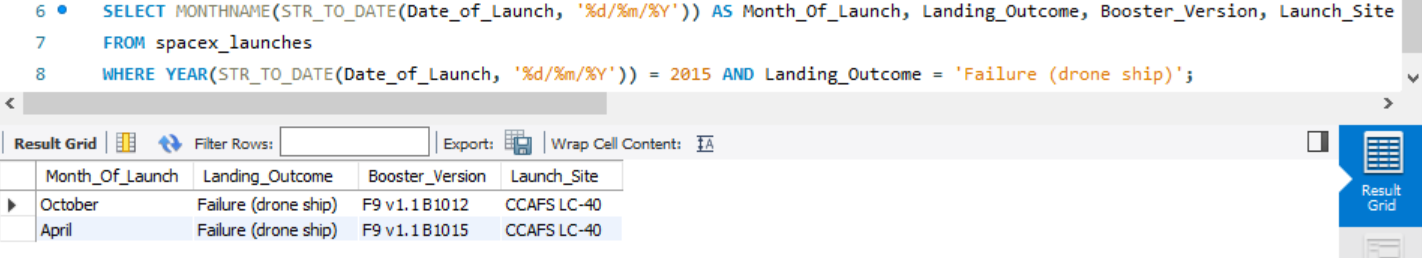

### Task 10




##### Rank the count of landing outcomes (such as Failure (drone ship) or Success (ground pad)) between the date 2010-06-04 and 2017-03-20, in descending order.


In [32]:
cursor.execute("SELECT DISTINCT Launch_Site, COUNT(Landing_Outcome) AS Rank_Of_Mission FROM ibm_capstone.spacex_launches WHERE Landing_Outcome = 'Success (ground pad)' OR Landing_Outcome = 'Failure (drone ship)' GROUP BY Launch_Site ORDER BY Rank_Of_Mission;")
result = cursor.fetchall()
for x in result:
    print(x)

('VAFB SLC-4E', 1)
('CCAFS SLC-40', 2)
('KSC LC-39A', 5)
('CCAFS LC-40', 6)


The SQL server used on this capstone was MySQL, because of this, a more understandable query can be found with the MySQL Workbench, as follows:<br>
<br> 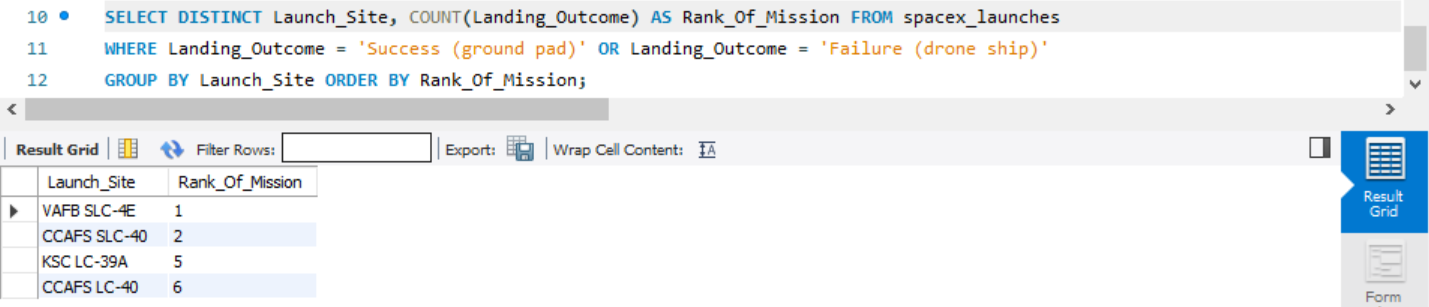

### Reference Links

* <a href ="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/Labs_Coursera_V5/labs/Lab%20-%20String%20Patterns%20-%20Sorting%20-%20Grouping/instructional-labs.md.html?origin=www.coursera.org">Hands-on Lab : String Patterns, Sorting and Grouping</a>  

*  <a  href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/Labs_Coursera_V5/labs/Lab%20-%20Built-in%20functions%20/Hands-on_Lab__Built-in_Functions.md.html?origin=www.coursera.org">Hands-on Lab: Built-in functions</a>

*  <a  href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/Labs_Coursera_V5/labs/Lab%20-%20Sub-queries%20and%20Nested%20SELECTs%20/instructional-labs.md.html?origin=www.coursera.org">Hands-on Lab : Sub-queries and Nested SELECT Statements</a>

*   <a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/Module%205/DB0201EN-Week3-1-3-SQLmagic.ipynb">Hands-on Tutorial: Accessing Databases with SQL magic</a>

*  <a href= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/Module%205/DB0201EN-Week3-1-4-Analyzing.ipynb">Hands-on Lab: Analyzing a real World Data Set</a>




## Author(s)

<h4> Lakshmi Holla </h4>


## Other Contributors

<h4> Rav Ahuja </h4>


## Change log
| Date | Version | Changed by | Change Description |
|------|--------|--------|---------|
| 2021-07-09 | 0.2 |Lakshmi Holla | Changes made in magic sql|
| 2021-05-20 | 0.1 |Lakshmi Holla | Created Initial Version |


## <h3 align="center"> © IBM Corporation 2021. All rights reserved. <h3/>
